In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler
from tcr_processing import *
import datetime
import csv
import anndata as an
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama


sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [126]:
    def load_data(contigs,feature_matrix):

        '''Load 10X transcriptomic and cell binding data'''
        
        print('Loading TCR binding and transcriptomics data')
        
                
        if not contigs[-3:]=='csv':
            raise TypeError('Contigs file should be in csv format')

        if not feature_matrix[-2:]=='h5':
            raise TypeError('Contigs file should be in h5 format')
        
        # Load TCR data
        adata_tcr = ir.io.read_10x_vdj(contigs)

        # Load associated transcriptomics data
        adata = sc.read_10x_h5(feature_matrix)

        # Merge
        ir.pp.merge_with_ir(adata, adata_tcr)

        print("Data loaded to Ann Object with shape: ",adata.shape)
        
        return adata

files=[("data/donor%s/vdj_v1_hs_aggregated_donor%s_all_contig_annotations.csv"%(donor,donor),
"data/donor%s/vdj_v1_hs_aggregated_donor%s_filtered_feature_bc_matrix.h5"%(donor,donor)) for donor in range(1,5)]
# adata1, adata2, adata3, adata4 = [load_data(pair[0],pair[1]) for pair in files]
adata1 = load_data("data/donor1/vdj_v1_hs_aggregated_donor1_all_contig_annotations.csv","data/donor1/vdj_v1_hs_aggregated_donor1_filtered_feature_bc_matrix.h5")

Loading TCR binding and transcriptomics data
reading data/donor1/vdj_v1_hs_aggregated_donor1_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/danhudson/opt/miniconda3/envs/10X/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'feature_types' as categorical
/Users/danhudson/opt/miniconda3/envs/10X/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'genome' as categorical


Data loaded to Ann Object with shape:  (55206, 33538)


In [127]:
adata=adata1.copy()
adata.obs

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


is_cell high_confidence multi_chain  \
AAACGGGAGAAGATTC-1     True            True       False   
AAACGGGTCGGACAAG-1     True            True       False   
AAAGATGGTACAGACG-1     True            True       False   
AAAGTAGAGACGCTTT-1     True            True       False   
AAAGTAGAGCGCTTAT-1     True            True       False   
...                     ...             ...         ...   
TTTGTCAAGGACAGCT-40    True            True       False   
TTTGTCAAGGGTCTCC-40    True            True       False   
TTTGTCACACGTCTCT-40    True            True       False   
TTTGTCAGTTACGCGC-40    True            True       False   
TTTGTCATCAGGTAAA-40    True            True       False   

                                                          extra_chains  \
AAACGGGAGAAGATTC-1   [{"c_call": "TRBC2", "consensus_count": 3996, ...   
AAACGGGTCGGACAAG-1                                                  []   
AAAGATGGTACAGACG-1   [{"c_call": "TRAC", "consensus_count": 18416, ...   
AAAGTAGAGACGCTTT-1                                                  []   
AAAGTAGAGCGCTTAT-1                                                  []   
...                                                                ...   
TTTGTCAAGGACAGCT-40                                                 []   
TTTGTCAAGGGTCTCC-40  [{"c_call": "TRBC1", "consensus_count": 11002,...   
TTTGTCACACGTCTCT-40                                                 []   
TTTGTCAGTTACGCGC-40                                                 []   
TTTGTCATCAGGTAAA-40                                                 []   

                    IR_VJ_1_c_call IR_VJ_2_c_call IR_VDJ_1_c_call  \
AAACGGGAGAAGATTC-1            TRAC            NaN           TRBC1   
AAACGGGTCGGACAAG-1            TRAC            NaN           TRBC2   
AAAGATGGTACAGACG-1            TRAC            NaN           TRBC2   
AAAGTAGAGACGCTTT-1            TRAC            NaN           TRBC2   
AAAGTAGAGCGCTTAT-1            TRAC           TRAC           TRBC2   
...                            ...            ...             ...   
TTTGTCAAGGACAGCT-40           TRAC            NaN           TRBC2   
TTTGTCAAGGGTCTCC-40           TRAC            NaN             NaN   
TTTGTCACACGTCTCT-40            NaN            NaN           TRBC2   
TTTGTCAGTTACGCGC-40           TRAC            NaN           TRBC2   
TTTGTCATCAGGTAAA-40           TRAC            NaN           TRBC1   

                    IR_VDJ_2_c_call  IR_VJ_1_consensus_count  \
AAACGGGAGAAGATTC-1              NaN                  36437.0   
AAACGGGTCGGACAAG-1              NaN                  18565.0   
AAAGATGGTACAGACG-1              NaN                  31549.0   
AAAGTAGAGACGCTTT-1              NaN                  34680.0   
AAAGTAGAGCGCTTAT-1              NaN                  30686.0   
...                             ...                      ...   
TTTGTCAAGGACAGCT-40             NaN                   7939.0   
TTTGTCAAGGGTCTCC-40             NaN                   2211.0   
TTTGTCACACGTCTCT-40             NaN                      NaN   
TTTGTCAGTTACGCGC-40             NaN                   3026.0   
TTTGTCATCAGGTAAA-40             NaN                   7696.0   

                     IR_VJ_2_consensus_count  ...  IR_VDJ_2_locus  \
AAACGGGAGAAGATTC-1                       NaN  ...             NaN   
AAACGGGTCGGACAAG-1                       NaN  ...             NaN   
AAAGATGGTACAGACG-1                       NaN  ...             NaN   
AAAGTAGAGACGCTTT-1                       NaN  ...             NaN   
AAAGTAGAGCGCTTAT-1                   23335.0  ...             NaN   
...                                      ...  ...             ...   
TTTGTCAAGGACAGCT-40                      NaN  ...             NaN   
TTTGTCAAGGGTCTCC-40                      NaN  ...             NaN   
TTTGTCACACGTCTCT-40                      NaN  ...             NaN   
TTTGTCAGTTACGCGC-40                      NaN  ...             NaN   
TTTGTCATCAGGTAAA-40                      NaN  ...             NaN

In [128]:
adata.var_names_make_unique()
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=200)

filtered out 16156 genes that are detected in less than 10 cells
filtered out 19 cells that have less than 200 genes expressed


In [129]:
sc.pp.highly_variable_genes(adata, flavor="cell_ranger", n_top_genes=5000)
sc.tl.pca(adata)
sc.pp.neighbors(adata)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:07)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:03)


In [130]:
adata

AnnData object with n_obs × n_vars = 55187 × 17382
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'n_genes'
    var

normalizing counts per cell
    finished (0:00:00)


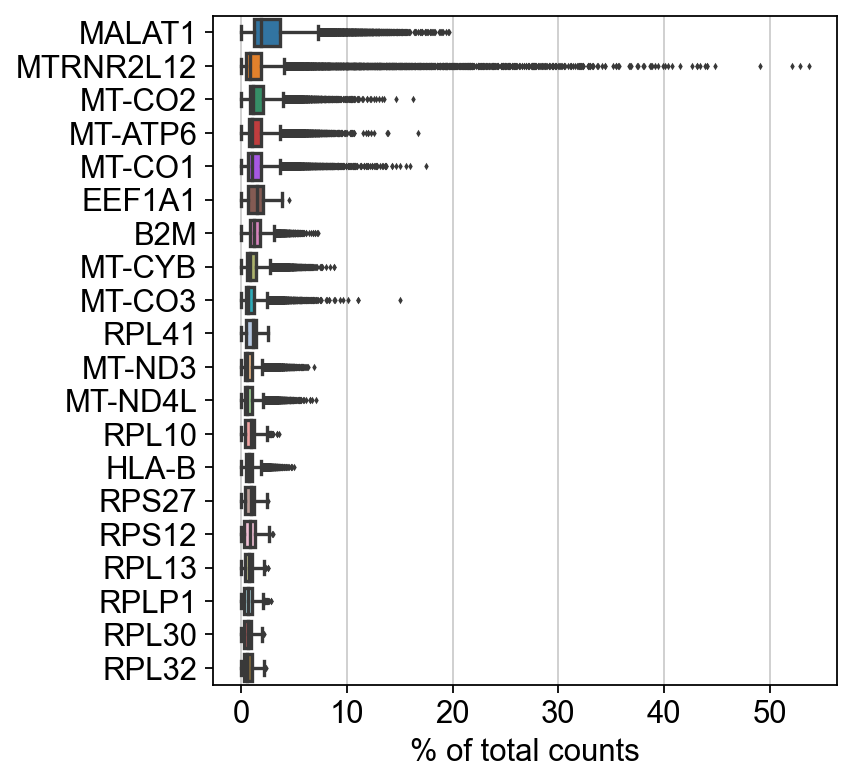

In [131]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [132]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # Generates a boolean mask for genes starting with 'MT'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)  # Returns total_counts_['mt'] for vars fed in via qc_vars
adata.var['mt']

AL627309.1    False
AL669831.5    False
LINC00115     False
FAM41C        False
NOC2L         False
              ...  
AL354822.1    False
AC004556.1    False
AC233755.2    False
AC233755.1    False
AC240274.1    False
Name: mt, Length: 17382, dtype: bool

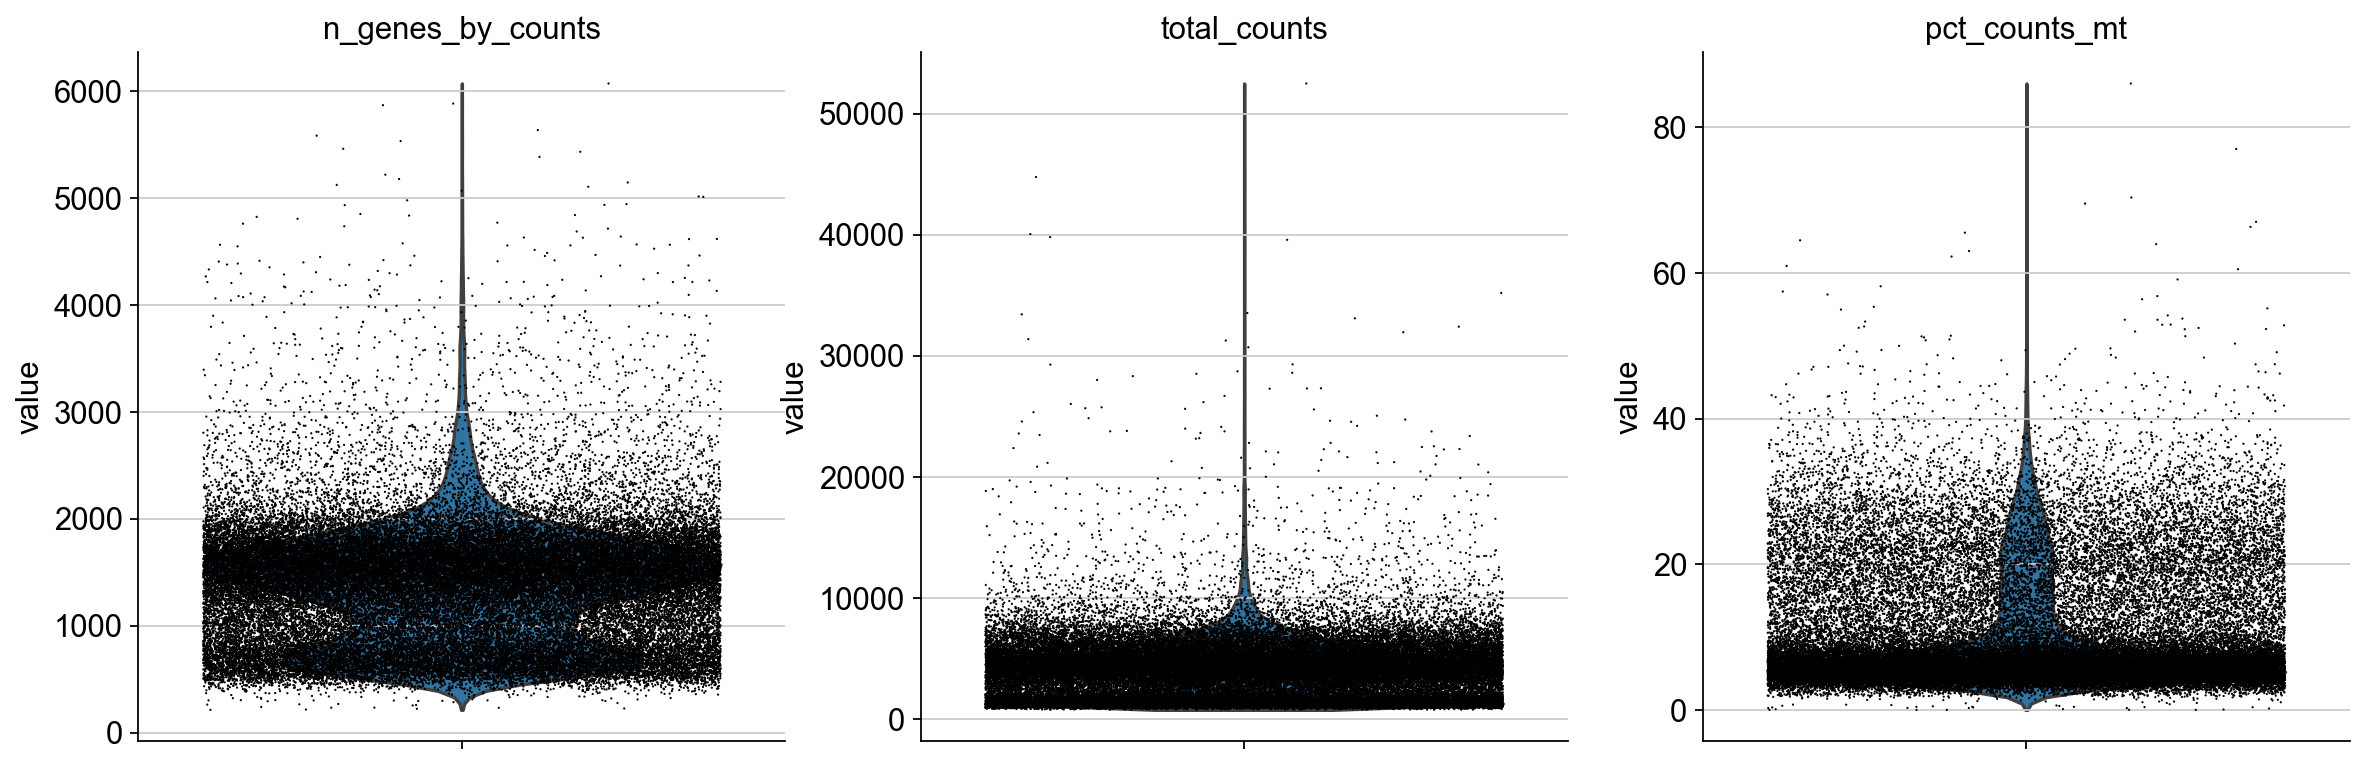

In [133]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts','pct_counts_mt'],
             jitter=0.4, multi_panel=True)

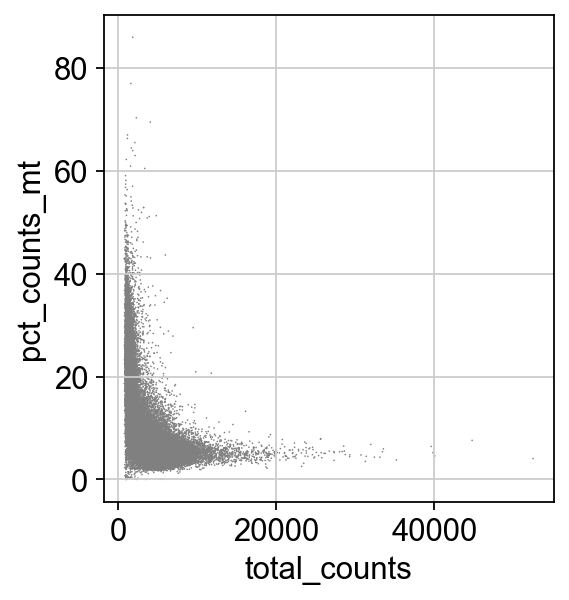

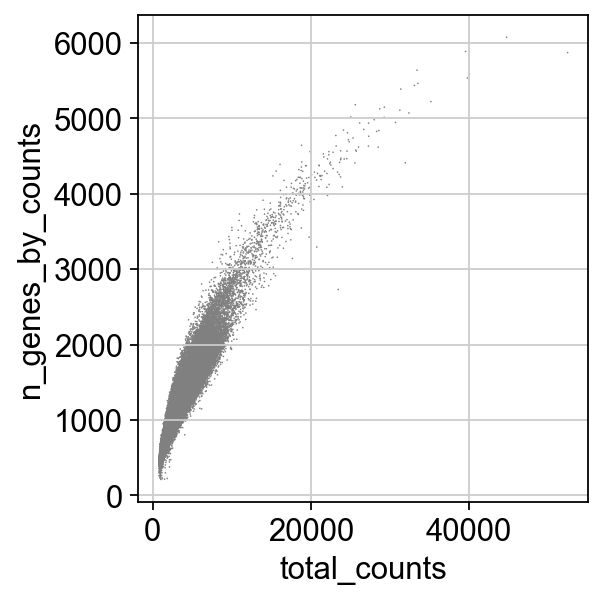

In [134]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

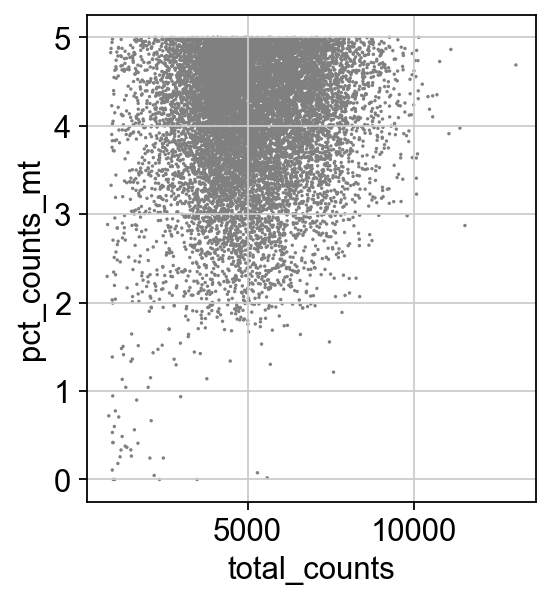

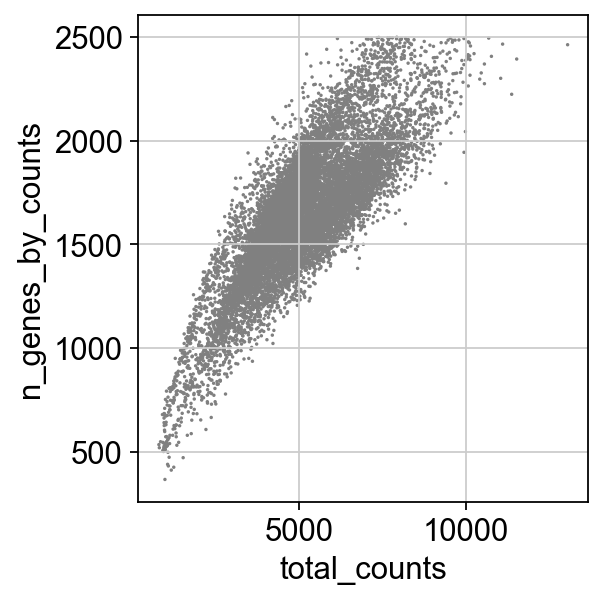

In [135]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [136]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell


/Users/danhudson/opt/miniconda3/envs/10X/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)


In [137]:
adata

AnnData object with n_obs × n_vars = 12553 × 17382
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'n_genes', 'n_gen

extracting highly variable genes
    finished (0:00:00)

highly_variable
AL627309.1    False
AL669831.5    False
LINC00115      True
FAM41C        False
NOC2L         False
              ...  
AL354822.1    False
AC004556.1    False
AC233755.2    False
AC233755.1    False
AC240274.1    False
Name: highly_variable, Length: 17382, dtype: bool

means
AL627309.1    2.088345e-03
AL669831.5    9.291513e-02
LINC00115     3.534541e-02
FAM41C        2.583180e-02
NOC2L         4.079324e-01
                  ...     
AL354822.1    7.591351e-03
AC004556.1    9.370075e-04
AC233755.2    1.000000e-12
AC233755.1    3.616568e-04
AC240274.1    1.057853e-02
Name: means, Length: 17382, dtype: float64

dispersions
AL627309.1    1.101786
AL669831.5    0.978773
LINC00115     1.007437
FAM41C        0.717932
NOC2L         0.789066
                ...   
AL354822.1    0.955691
AC004556.1    0.760446
AC233755.2         NaN
AC233755.1    0.416111
AC240274.1    0.751612
Name: dispersions, Length: 17382, dtype: flo

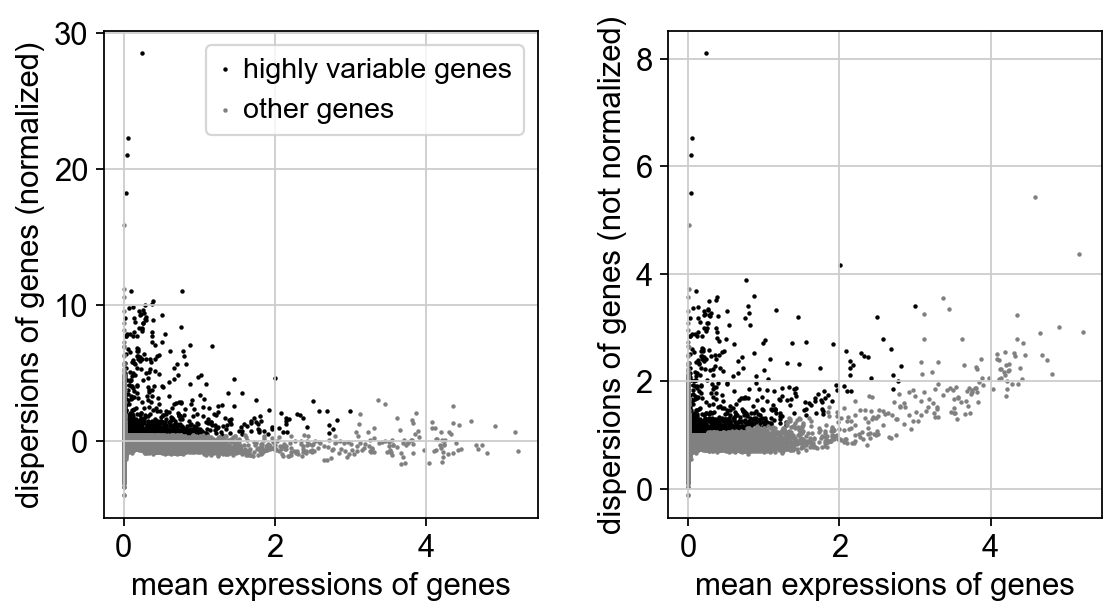

In [138]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
for var in ['highly_variable','means','dispersions','dispersions_norm']:
    print("\n%s\n%s"%(var,adata.var[var]))
sc.pl.highly_variable_genes(adata)

In [139]:
adata.raw = adata
adata.raw.var

gene_ids    feature_types  genome  n_cells  \
AL627309.1  ENSG00000238009  Gene Expression  GRCh38       56   
AL669831.5  ENSG00000237491  Gene Expression  GRCh38     2115   
LINC00115   ENSG00000225880  Gene Expression  GRCh38      891   
FAM41C      ENSG00000230368  Gene Expression  GRCh38      562   
NOC2L       ENSG00000188976  Gene Expression  GRCh38    10257   
...                     ...              ...     ...      ...   
AL354822.1  ENSG00000278384  Gene Expression  GRCh38      249   
AC004556.1  ENSG00000276345  Gene Expression  GRCh38       17   
AC233755.2  ENSG00000277856  Gene Expression  GRCh38       59   
AC233755.1  ENSG00000275063  Gene Expression  GRCh38       10   
AC240274.1  ENSG00000271254  Gene Expression  GRCh38      310   

            highly_variable         means  dispersions  dispersions_norm  \
AL627309.1            False  2.088345e-03     1.101786          0.880109   
AL669831.5            False  9.291513e-02     0.978773          0.394895   
LINC00115              True  3.534541e-02     1.007437          0.507960   
FAM41C                False  2.583180e-02     0.717932         -0.633971   
NOC2L                 False  4.079324e-01     0.789066         -0.504860   
...                     ...           ...          ...               ...   
AL354822.1            False  7.591351e-03     0.955691          0.303851   
AC004556.1            False  9.370075e-04     0.760446         -0.466277   
AC233755.2            False  1.000000e-12          NaN          0.000000   
AC233755.1            False  3.616568e-04     0.416111         -1.824480   
AC240274.1            False  1.057853e-02     0.751612         -0.501122   

               mt  n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
AL627309.1  False                 56     0.001033              99.898527   
AL669831.5  False               2115     0.039466              96.167576   
LINC00115   False                891     0.016399              98.385489   
FAM41C      False                562     0.010274              98.981644   
NOC2L       False              10257     0.207241              81.414101   
...           ...                ...          ...                    ...   
AL354822.1  False                249     0.004530              99.548807   
AC004556.1  False                 17     0.000308              99.969196   
AC233755.2  False                 59     0.001087              99.893091   
AC233755.1  False                 10     0.000217              99.981880   
AC240274.1  False                310     0.005835              99.438274   

            total_counts  
AL627309.1          57.0  
AL669831.5        2178.0  
LINC00115          905.0  
FAM41C             567.0  
NOC2L            11437.0  
...                  ...  
AL354822.1         250.0  
AC004556.1          17.0  
AC233755.2          60.0  
AC233755.1          12.0  
AC240274.1         322.0  

[17382 rows x 13 columns]

In [140]:
# adata = adata[:, adata.var.highly_variable]
# adata.var

In [141]:
# Regress out the impact of total cell counts and mt expression
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) 

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:02:54)


In [142]:
# Scale to unit variance, clipping at 10 STD
sc.pp.scale(adata, max_value=10)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


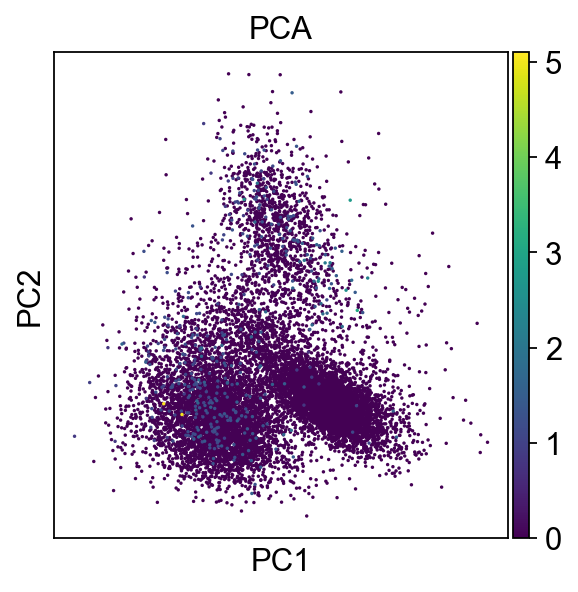

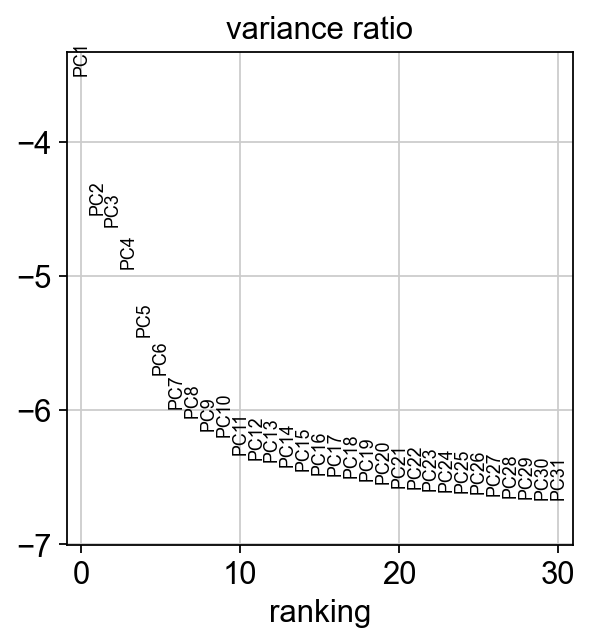

In [143]:
# Run PCA to reduce dimensionality
sc.tl.pca(adata, svd_solver='arpack') # NB you don't need to filter out cells on hvg if running PCA
sc.pl.pca(adata, color='CST3',title="PCA")
sc.pl.pca_variance_ratio(adata, log=True)

In [144]:
sc.tl.leiden(adata) # Generate clusters for paga graph

#retain leiden clusters with >1 member
shortlist=list(set([l for l in adata.obs['leiden'].values if len(adata.obs[adata.obs['leiden']==l])>1]))
adata = adata[adata.obs.leiden.isin(shortlist), :]
sc.tl.paga(adata) # Creates a course-grained manifold strucutre prior to UMAP
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

running Leiden clustering
    finished (0:00:01)
running PAGA


Trying to set attribute `._uns` of view, copying.


    finished (0:00:02)
computing UMAP
    finished (0:00:04)


computing UMAP
    finished (0:00:05)


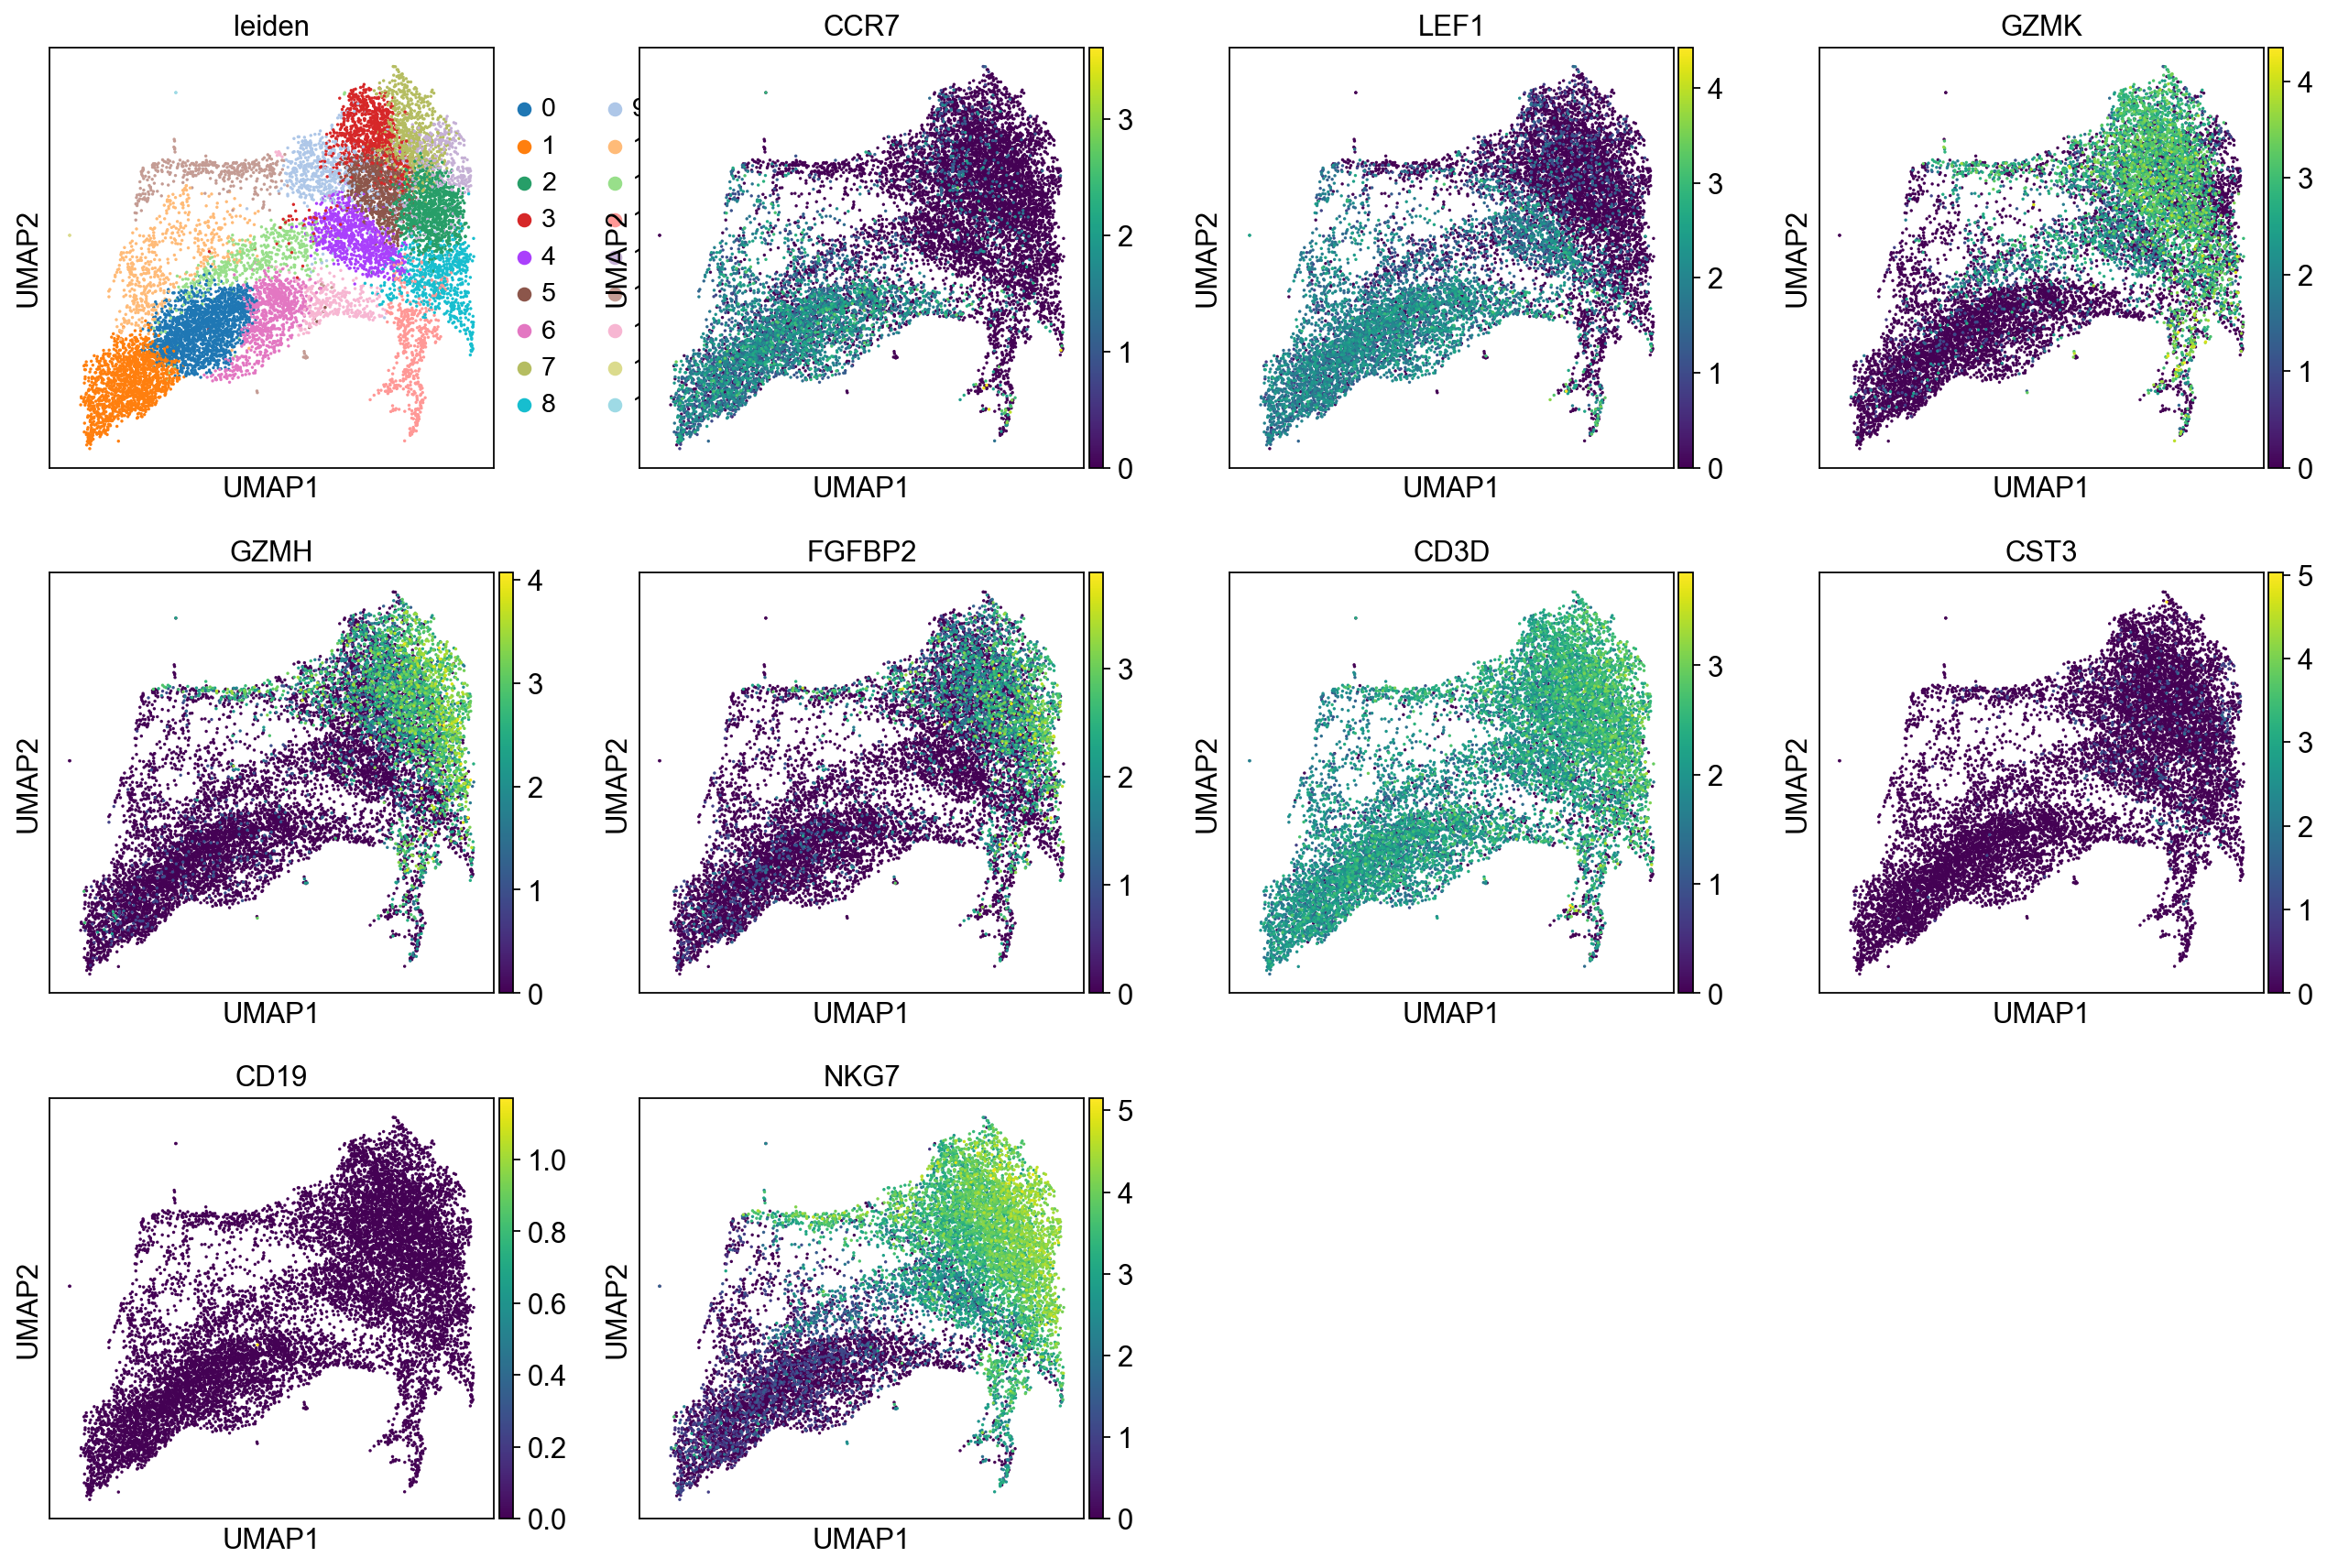

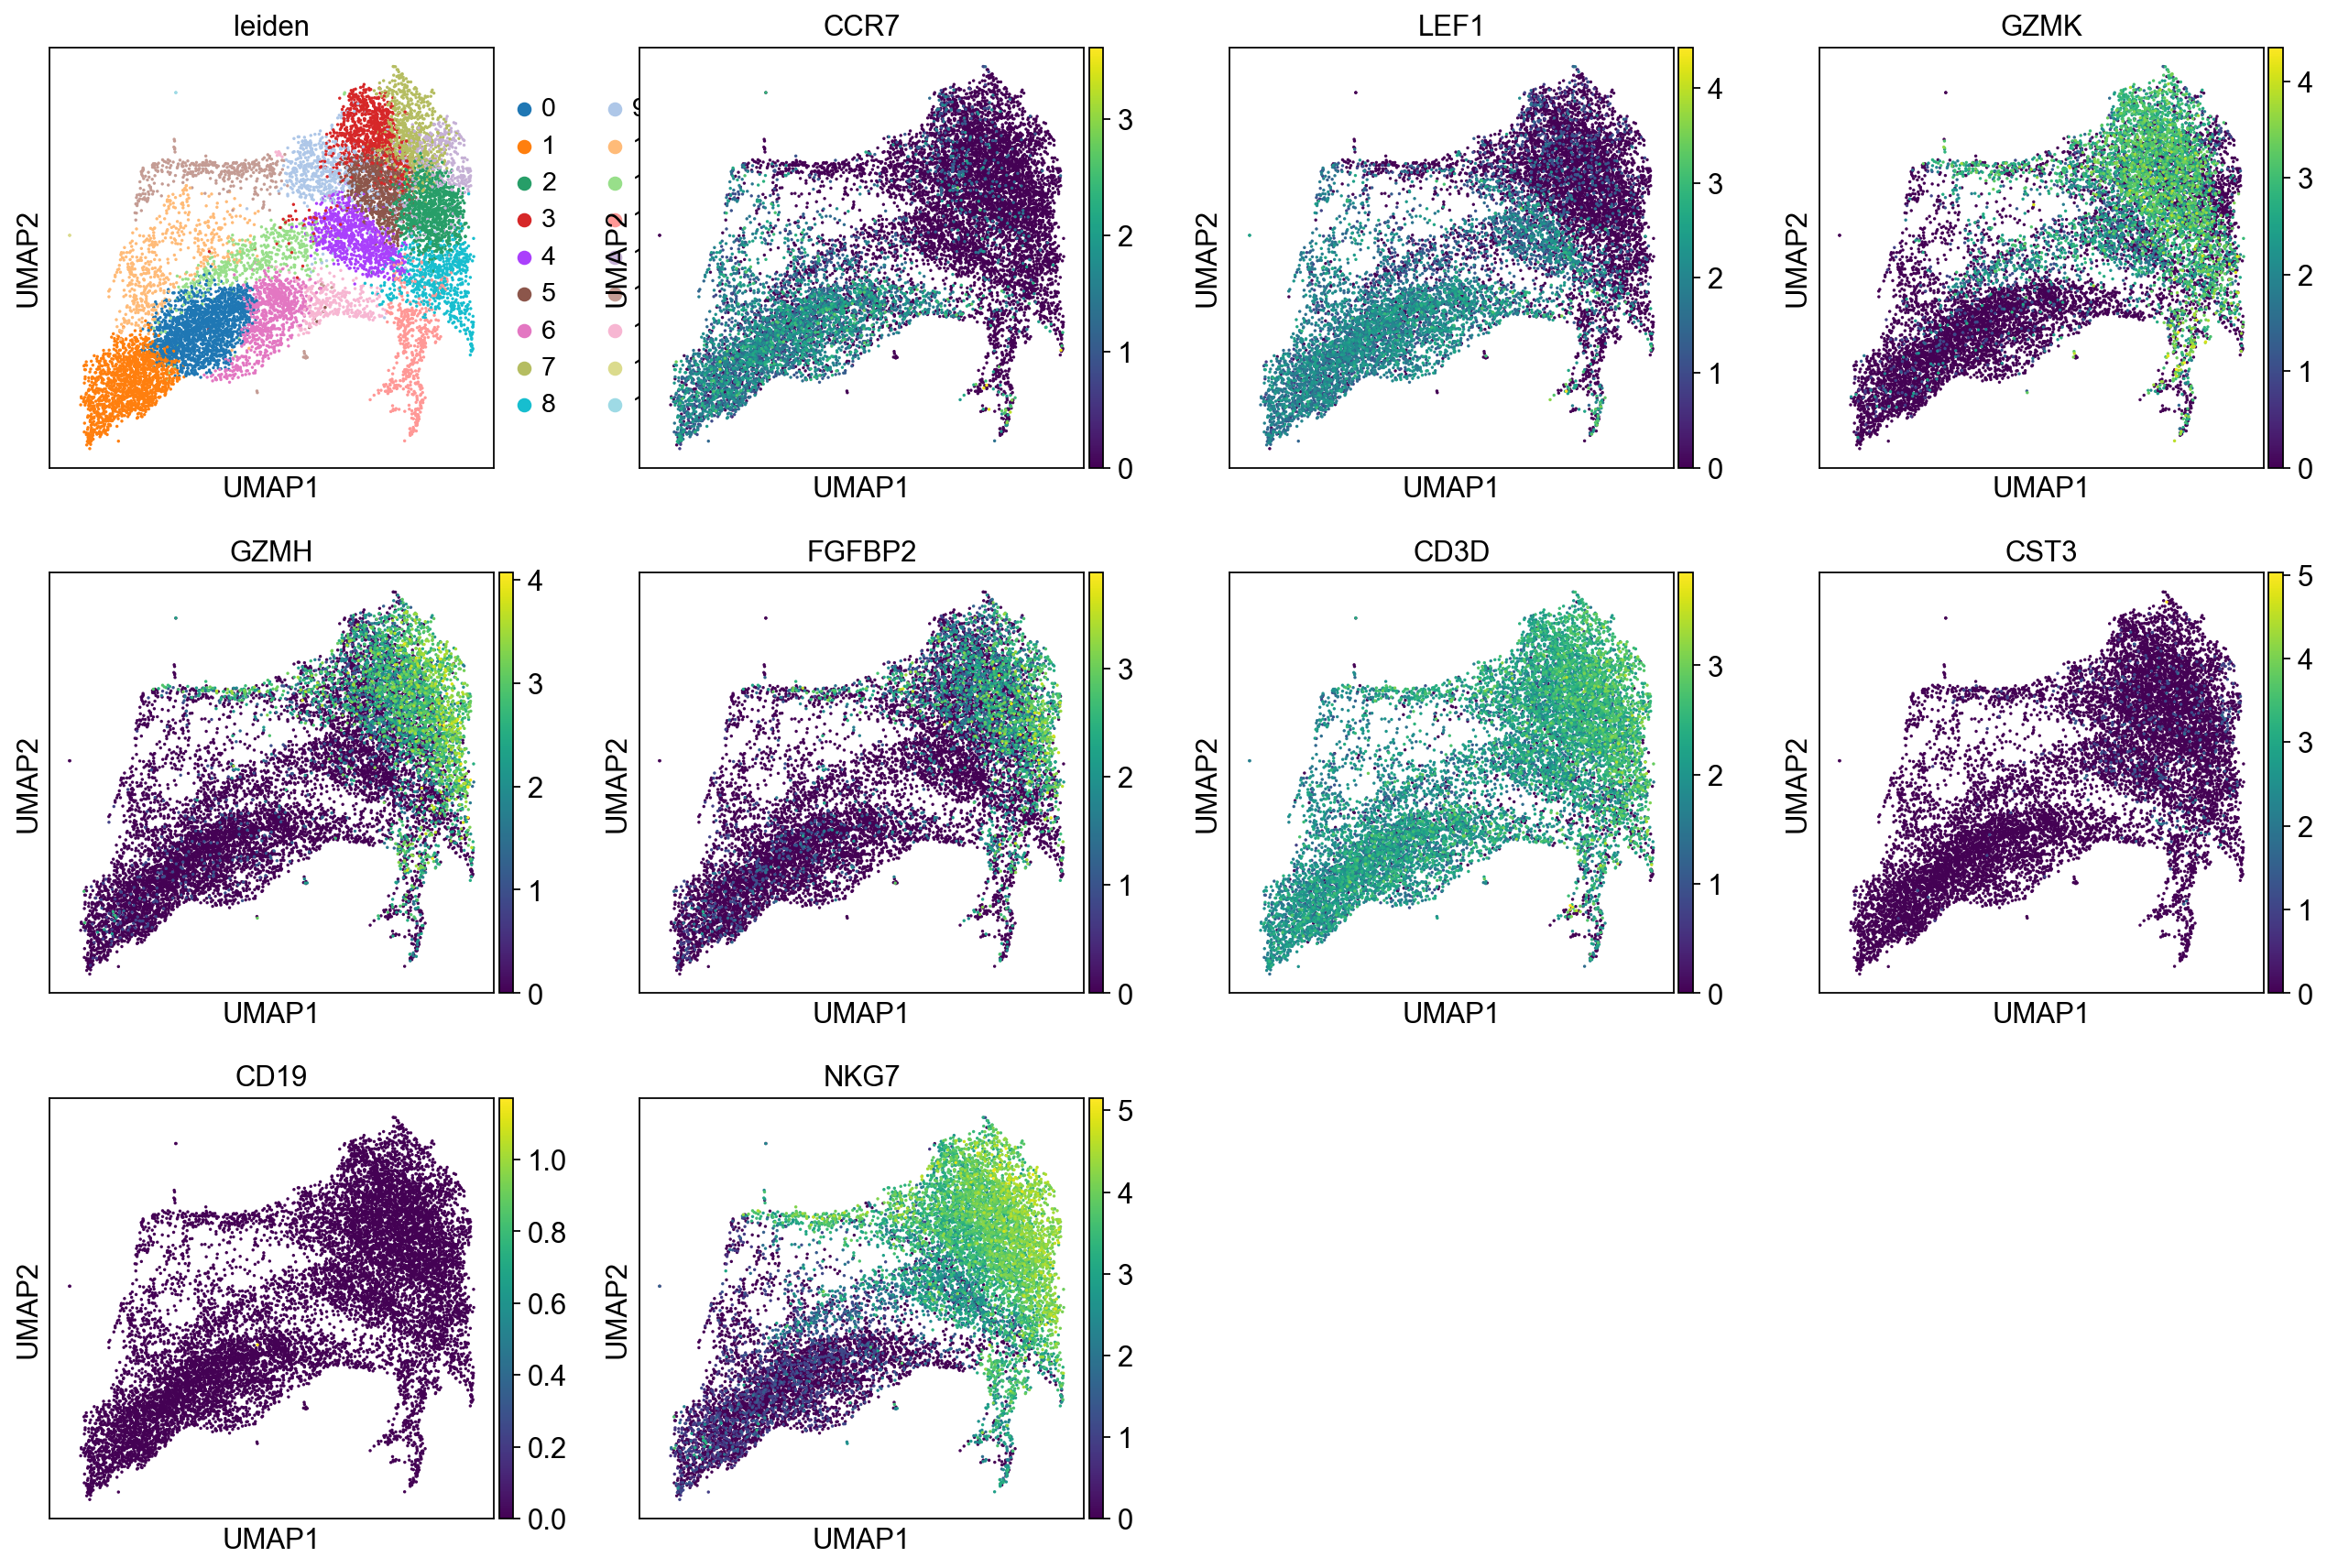

In [145]:
sc.tl.umap(adata)
sc.pl.umap(adata, use_raw=True, color=['leiden','CCR7','LEF1','GZMK','GZMH','FGFBP2','CD3D','CST3','CD19', 'NKG7']) # Markers for T cells, monoctyes/DC, B cells and NK cells
sc.pl.umap(adata, color=['leiden','CCR7','LEF1','GZMK','GZMH','FGFBP2','CD3D','CST3','CD19', 'NKG7']) # Markers for T cells, monoctyes/DC, B cells and NK cells